In [1]:
import pandas as pd
import numpy as np

import dask
import dask.dataframe as dd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from IPython.display import display, HTML, clear_output
import time

def draw_progress_bar(iteration, total, prefix='', suffix='', length=50):
    percent = ("{0:.1f}").format(100 * (iteration / float(total)))
    filled_length = int(length * iteration // total)
    bar = '#' * filled_length + '-' * (length - filled_length)
    progress_str = f'{prefix} [{bar}] {percent}% {suffix}'
    return progress_str

In [4]:
image_server = pd.read_csv('image_server_demand.csv')

In [5]:
image_server.shape[0]

3977

In [6]:
image_server.describe()

,demand_data_average,last_2mins_request,last_10mins_request,last_30mins_request,last_60mins_request,last_180mins_request
count,3.977000e+03,3.977000e+03,3.977000e+03,3.977000e+03,3977.000000,3.977000e+03
mean,2.874184e+06,2.286886e-16,5.717216e-17,1.143443e-16,0.000000,1.715165e-16
std,1.513976e+06,1.000126e+00,1.000126e+00,1.000126e+00,1.000126,1.000126e+00
min,3.055100e+04,-1.915085e+00,-1.861581e+00,-1.851383e+00,-1.841139,-1.904235e+00
25%,1.560155e+06,-8.906524e-01,-9.518480e-01,-9.105763e-01,-0.865915,-8.961620e-01
50%,3.260940e+06,3.817991e-01,3.953494e-01,3.991025e-01,0.433263,4.729619e-01
75%,3.966240e+06,7.421771e-01,7.623803e-01,7.788996e-01,0.762715,5.963884e-01
max,6.911696e+06,1.828207e+00,1.386633e+00,1.190338e+00,1.115483,1.076616e+00


In [7]:
image_server['demand_data_average'].max()

6911696

In [8]:
from sklearn.model_selection import train_test_split

X = image_server.drop('demand_data_average', axis=1)
y = image_server['demand_data_average']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# Initialize MLP Regressor
mlp_regressor = MLPRegressor(hidden_layer_sizes=(5, 3),  # Specify the number of hidden layers and neurons
                              max_iter=1000,               # Maximum number of iterations
                              random_state=42)            # Random seed for reproducibility

# Train the MLP Regressor
mlp_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = mlp_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse ** 0.5}')

In [10]:
from sklearn.linear_model import LinearRegression

linear_reg_model = LinearRegression()


# Train the Linear Regression model
linear_reg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = linear_reg_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse ** 0.5}')


Mean Squared Error: 522685.0793356581


In [11]:
image_server['predictions'] = linear_reg_model.predict(X)

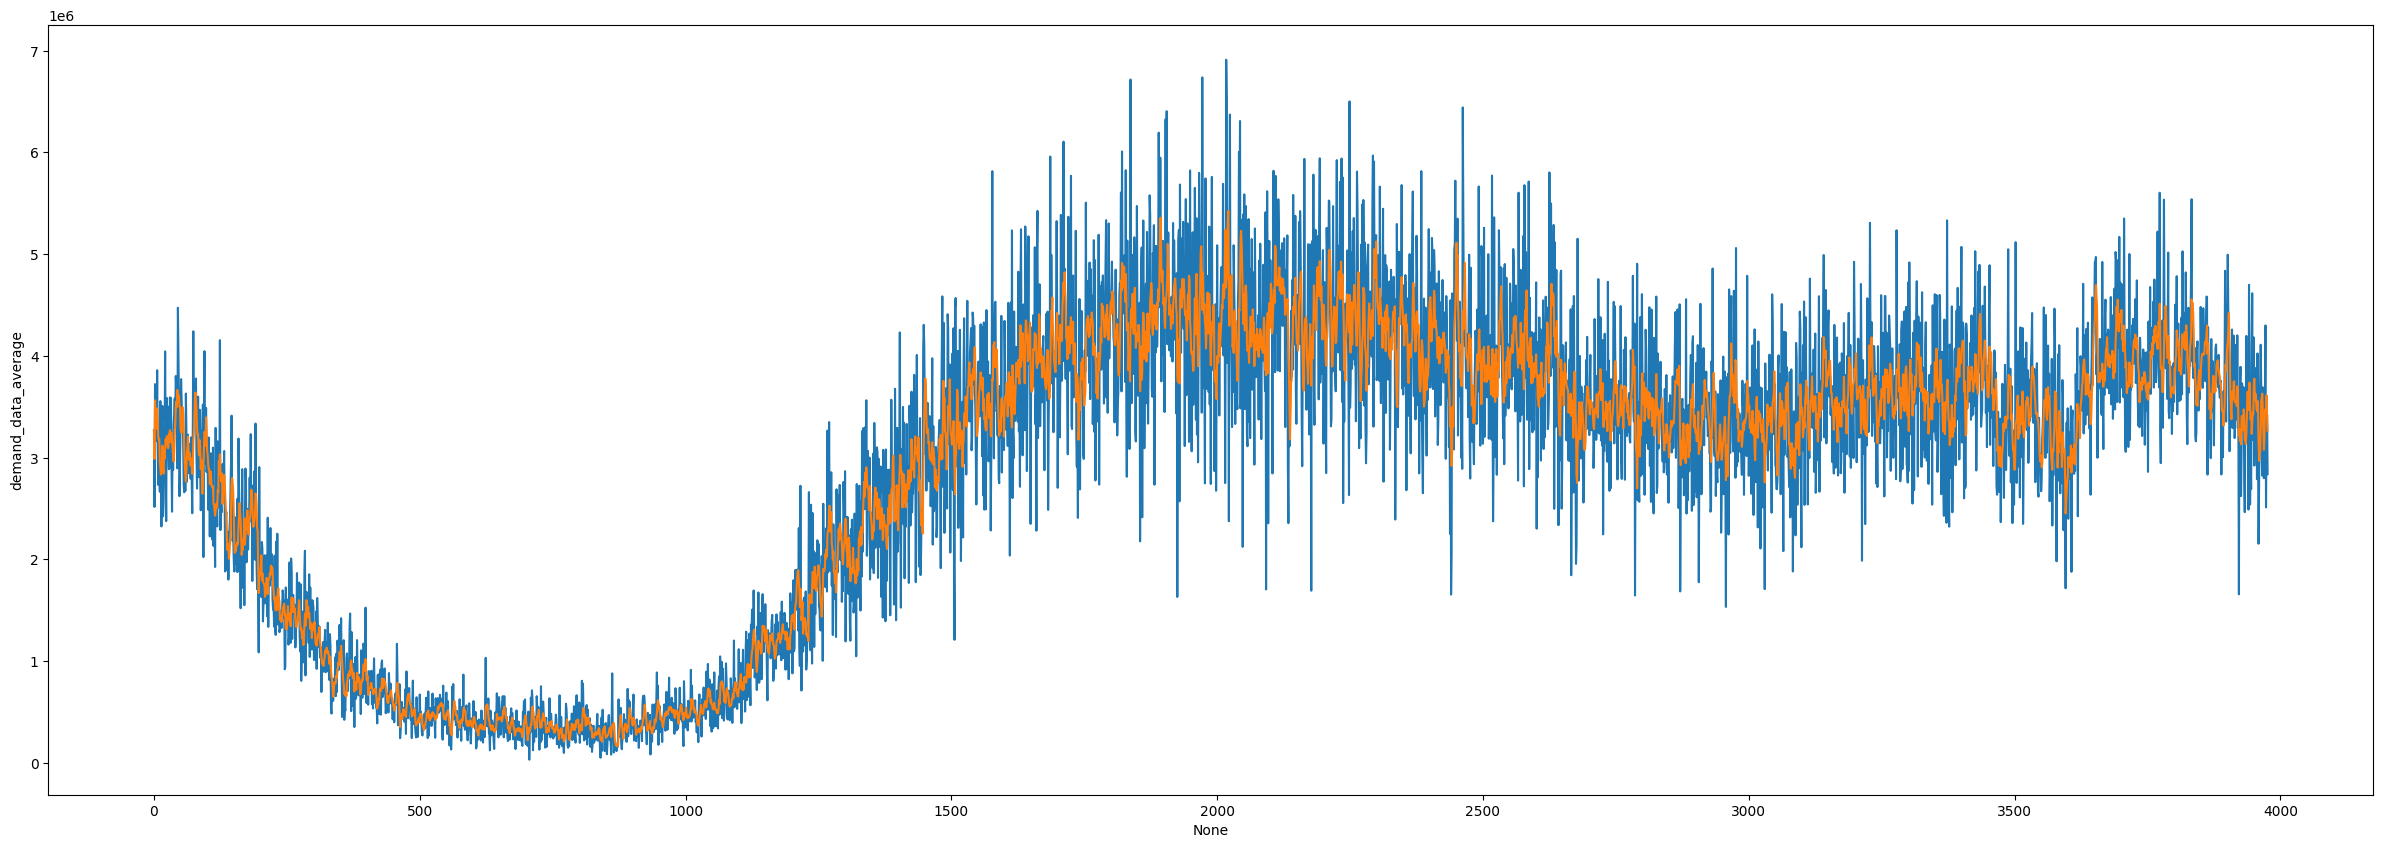

In [12]:
plt.figure(figsize=(30, 10))
sns.lineplot(x=image_server.index, y='demand_data_average', data=image_server)
sns.lineplot(x=image_server.index, y='predictions', data=image_server)
plt.show()

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets

# Function to calculate y-values at specific intervals
def calculate_points(a, b, c, d, e):
    x_points = [180, 60, 30, 10, 2]
    y_points = np.array([a, b, c, d, e])
    
    return x_points, y_points

def update_curve(a, b, c, d, e):
    x = np.linspace(200, 0, 100)
    y = np.linspace(-2, 2, 100)

    
    
    x_points, y_points = calculate_points(a, b, c, d, e)

    coefficients = np.polyfit(x_points, y_points, 2)
    poly = np.poly1d(coefficients)
    
    # Generate y values for the line of best fit
    x_fit = np.linspace(min(x_points), max(x_points), 100)  # Generate 100 x values for smooth curve

    y_fit = poly(x_fit)

    plt.subplot(1, 2, 1) 
    
    plt.gca().invert_xaxis()
    
    plt.scatter(x_points, y_points, color='grey', label='Points')    

    plt.plot(x_fit, y_fit, label='Line of Best Fit', color='blue')
    
    specific_values = [180, 60, 30, 10, 2]  # Add the values you want to label
    plt.xticks(specific_values, ['180 Minutes', '60 Minutes', '30 Minutes', '10 Minutes', '2 Minutes'], rotation='vertical')
    
    plt.title('Interactive Curve Manipulation')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.ylim(-2, 2)

    plt.subplot(1, 2, 2) 

    reversed_arr = y_points[::-1]
    
    y_pred = linear_reg_model.predict([reversed_arr])
    
    plt.bar('Demand', y_pred, color='blue')

    plt.ylim(0, 7000000)
    
    plt.tight_layout()
    plt.show()
    

# Define the interactive widget
interact(update_curve, 
         a=widgets.FloatSlider(min=-2, max=2, step=0.01, value=0, description='a'),
         b=widgets.FloatSlider(min=-2, max=2, step=0.01, value=0, description='b'),
         c=widgets.FloatSlider(min=-2, max=2, step=0.01, value=0, description='c'),
         d=widgets.FloatSlider(min=-2, max=2, step=0.01, value=0, description='d'),
         e=widgets.FloatSlider(min=-2, max=2, step=0.01, value=0, description='e'))


interactive(children=(FloatSlider(value=0.0, description='a', max=2.0, min=-2.0, step=0.01), FloatSlider(value…

<function __main__.update_curve(a, b, c, d, e)>